In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("house_data.csv")

In [3]:
df.head()

,date,age,distance,stores,latitude,longitude,price
0,2009,21,9,6,84,121,14264
1,2007,4,2,3,86,121,12032
2,2016,18,3,7,90,120,13560
3,2002,13,2,2,80,128,12029
4,2014,25,5,8,81,122,14157


In [4]:
df = df.iloc[:,1:]
df_norm = (df - df.mean()) / df.std()
df_norm.head()

,age,distance,stores,latitude,longitude,price
0,0.181384,1.257002,0.345224,-0.307212,-1.260799,0.350088
1,-1.319118,-0.930610,-0.609312,0.325301,-1.260799,-1.836486
2,-0.083410,-0.618094,0.663402,1.590328,-1.576456,-0.339584
3,-0.524735,-0.930610,-0.927491,-1.572238,0.948803,-1.839425
4,0.534444,0.006938,0.981581,-1.255981,-0.945141,0.245266


In [5]:
def df_column_switch(df, column1, column2):
    i = list(df.columns)
    a, b = i.index(column1), i.index(column2)
    i[b], i[a] = i[a], i[b]
    df = df[i]
    return df

df = df_column_switch(df_norm, "age", "price")

In [6]:
df.head()

,price,distance,stores,latitude,longitude,age
0,0.350088,1.257002,0.345224,-0.307212,-1.260799,0.181384
1,-1.836486,-0.930610,-0.609312,0.325301,-1.260799,-1.319118
2,-0.339584,-0.618094,0.663402,1.590328,-1.576456,-0.083410
3,-1.839425,-0.930610,-0.927491,-1.572238,0.948803,-0.524735
4,0.245266,0.006938,0.981581,-1.255981,-0.945141,0.534444


In [7]:
df.isnull().values.any()

False

In [8]:
df.duplicated().values.any()

False

In [9]:
data = np.array(df)
m,n = data.shape
print(f"m: {m}")
print(f"n: {n}")

m: 5000
n: 6


In [10]:
val_data = data[0 : 1000].T
Y_val = val_data[0]
X_val = val_data[1 : n]

train_data = data[1000 : m].T
Y_train = train_data[0]
X_train = train_data[1 : n]

In [11]:
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)

(5, 4000)
(4000,)
(5, 1000)
(1000,)


In [12]:
from NeuroInsight.parameter_initialization import ParameterInitialization
from NeuroInsight.forward_propagation import ForwardPropagationForRegression
from NeuroInsight.back_propagation import BackPropagationForRegression
from NeuroInsight.cost_function import UpdateParameters
from NeuroInsight.evaluation import Evaluation
from NeuroInsight.visualization import Visualization

In [13]:
forward_propagation = ForwardPropagationForRegression()
back_propagation = BackPropagationForRegression()
update_parameters = UpdateParameters()
evaluation = Evaluation()
visualization = Visualization()

In [14]:
n_layers = 3
n_classes = 1
n_neurons_per_layer = [50, 30, 20]
parameter_init = ParameterInitialization(X_train.shape[0], n_layers, n_neurons_per_layer, n_classes)
weights, biases = parameter_init.initialize_parameters()

In [15]:
visualization.plot_neural_network_architecture(X_train.shape[0], n_layers, n_neurons_per_layer, n_classes)

In [16]:
epochs = 1000
learning_rate = 0.1

In [17]:
losses = []

for i in range(epochs):
    forward_output = forward_propagation.forward_propagation_regression(weights, biases, X_train)
    back_output = back_propagation.back_propagation_regression(forward_output, weights, X_train, Y_train, m)
    derivatives = {key: value for key, value in back_output.items() if key.startswith('d')}
    weights, biases = update_parameters.update_parameters(weights, biases, derivatives, learning_rate)
    
    key, value = list(forward_output.items())[-1]

    loss = evaluation.root_mean_squared_error(value.flatten(), Y_train)
    losses.append(loss)

    if i % 10 == 0:
        print("Epoch:", i)
        Y_predicted = value.flatten()
        print(f"Rmse: {(evaluation.root_mean_squared_error(Y_predicted, Y_train))}")
        print("~~~~~~~~~~~~~~~~~") 

Epoch: 0
Rmse: 1.4830617854891759
~~~~~~~~~~~~~~~~~
Epoch: 10
Rmse: 0.7627129777030938
~~~~~~~~~~~~~~~~~
Epoch: 20
Rmse: 0.5427563751023406
~~~~~~~~~~~~~~~~~
Epoch: 30
Rmse: 0.4808801612293772
~~~~~~~~~~~~~~~~~
Epoch: 40
Rmse: 0.5813594764805986
~~~~~~~~~~~~~~~~~
Epoch: 50
Rmse: 0.4471255973489801
~~~~~~~~~~~~~~~~~
Epoch: 60
Rmse: 0.43412559246769344
~~~~~~~~~~~~~~~~~
Epoch: 70
Rmse: 0.42806579488067287
~~~~~~~~~~~~~~~~~
Epoch: 80
Rmse: 0.42356724297019466
~~~~~~~~~~~~~~~~~
Epoch: 90
Rmse: 0.4199738456237117
~~~~~~~~~~~~~~~~~
Epoch: 100
Rmse: 0.4169495186259142
~~~~~~~~~~~~~~~~~
Epoch: 110
Rmse: 0.4144267735288714
~~~~~~~~~~~~~~~~~
Epoch: 120
Rmse: 0.41229180403978033
~~~~~~~~~~~~~~~~~
Epoch: 130
Rmse: 0.410487548442878
~~~~~~~~~~~~~~~~~
Epoch: 140
Rmse: 0.40888696069076597
~~~~~~~~~~~~~~~~~
Epoch: 150
Rmse: 0.40745251118378867
~~~~~~~~~~~~~~~~~
Epoch: 160
Rmse: 0.40614761815870176
~~~~~~~~~~~~~~~~~
Epoch: 170
Rmse: 0.40497950340150907
~~~~~~~~~~~~~~~~~
Epoch: 180
Rmse: 0.4039022196278

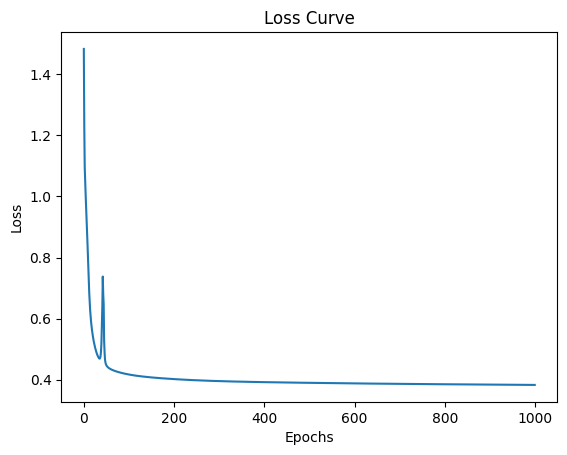

In [18]:
visualization.plot_loss_curve(losses)

In [19]:
print(f"The rmse on validation set is {evaluation.regression_validation_predictions(weights, biases, X_val, Y_val)}")

The rmse on validation set is 0.40906024276623393
